In [31]:
# Python
import pandas as pd
from fbprophet import Prophet
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
df_pr= pd.read_csv("total case for arima.csv")
df_pr['cap'] = 300
b = df_pr.iloc[1:663]
train_data_pr = df_pr.iloc[:len(df_pr)-60]
test_data_pr = df_pr.iloc[len(df_pr)-60:len(df_pr)-30]
new=df_pr.iloc[len(df_pr)-30:]
from fbprophet import Prophet


In [32]:
print(train_data_pr.shape)
print(test_data_pr.shape)
print(new.shape)
print(b.shape)

(639, 5)
(30, 5)
(30, 5)
(662, 5)


In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [5]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [25,50,75,100]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 200


In [6]:
import holidays
holiday = pd.DataFrame([])
for date, name in sorted(holidays.UnitedStates(years=[2020]).items()):
    holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday

,ds,holiday
0,2020-01-01,US-Holidays
1,2020-01-20,US-Holidays
2,2020-02-17,US-Holidays
3,2020-05-25,US-Holidays
4,2020-07-03,US-Holidays
5,2020-07-04,US-Holidays
6,2020-09-07,US-Holidays
7,2020-10-12,US-Holidays
8,2020-11-11,US-Holidays
9,2020-11-26,US-Holidays


In [7]:

strt='1/3/2020'
end='25-11-21'
import random
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
import sys, time

for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                        
                         yearly_seasonality = True,
                         holidays=holiday, 
                         interval_width=0.95)
   
  
    train_model.add_country_holidays(country_name='US')
    train_model.fit(train_data_pr)
    train_forecast = train_model.make_future_dataframe(periods=30
                                                       , freq='D',include_history = False)
    start=time.time() 
    train_forecast = train_model.predict(train_forecast)
    end = time.time()
    print("Time took {:3.4f} s".format((end-start)))
    print(start)
    print(end)
    test=train_forecast[['ds','yhat']]
    Actual = test_data_pr['y']
    MAPE = mean_absolute_percentage_error(Actual,abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9218 s
1644573514.9163945
1644573516.8381588
Mean Absolute Percentage Error(MAPE)------------------------------------ 47.37743583230001
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8499 s
1644573517.6596713
1644573519.50961
Mean Absolute Percentage Error(MAPE)------------------------------------ 41.35046553779912
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8879 s
1644573519.9724262
1644573521.8603475
Mean Absolute Percentage Error(MAPE)------------------------------------ 47.37743583230001
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8509 s
1644573522.692985
1644573524.5439248
Mean Absolute Percentage Error(MAPE)------------------------------------ 41.35046553779912
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}
Time took 1.8599 s
1644573525.012173
1644573526.8721085
Mean Absolute Percentage Error(MAPE)------------------------------------ 47.37743583230001
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8000 s
1644573529.1152122
1644573530.9151795
Mean Absolute Percentage Error(MAPE)------------------------------------ 41.35046553779912
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8759 s
1644573531.3956923
1644573533.2716205
Mean Absolute Percentage Error(MAPE)------------------------------------ 47.37743583230001
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8060 s
1644573534.0612998
1644573535.867279
Mean Absolute Percentage Error(MAPE)------------------------------------ 41.35046553779912
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8609 s
1644573536.808044
1644573538.6689787
Mean Absolute Percentage Error(MAPE)------------------------------------ 48.39632280612929
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9619 s
1644573539.3166084
1644573541.2784855
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.9471438050265
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8120 s
1644573542.18297
1644573543.994931
Mean Absolute Percentage Error(MAPE)------------------------------------ 48.39632280612929
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8919 s
1644573544.6300602
1644573546.521998
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.9471438050265
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}
Time took 1.8429 s
1644573547.430446
1644573549.273391
Mean Absolute Percentage Error(MAPE)------------------------------------ 48.39632280612929
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9809 s
1644573550.012966
1644573551.993834
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.9471438050265
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8949 s
1644573553.0022578
1644573554.8971906
Mean Absolute Percentage Error(MAPE)------------------------------------ 48.39632280612929
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8819 s
1644573555.5245645
1644573557.4064882
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.9471438050265
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8649 s
1644573558.075105
1644573559.9400182
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.37221366585929
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8480 s
1644573560.7116702
1644573562.5596333
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.881210339672855
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8300 s
1644573563.227849
1644573565.057801
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.37221366585929
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9419 s
1644573566.9320045
1644573568.8738952
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.881210339672855
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8929 s
1644573569.5804274
1644573571.4733424
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.37221366585929
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8539 s
1644573572.2559114
1644573574.1098545
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.881210339672855
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1588 s
1644573574.7597084
1644573576.9184732
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.37221366585929
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1538 s
1644573579.2251515
1644573581.37892
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.881210339672855
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8040 s
1644573582.0726948
1644573583.8766668
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.22393940820937
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8040 s
1644573584.5404787
1644573586.3444448
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.81055958785008
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8580 s
1644573587.0438404
1644573588.9017978
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.22393940820937
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8829 s
1644573589.5676925
1644573591.450614
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.81055958785008
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8749 s
1644573592.1805837
1644573594.0555313
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.22393940820937
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8130 s
1644573594.740103
1644573596.5530827
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.81055958785008
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8479 s
1644573597.2436879
1644573599.0916307
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.22393940820937
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9679 s
1644573599.774222
1644573601.742113
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.81055958785008
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8260 s
1644573602.2677948
1644573604.093747
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.646284849873155
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'additive'}
Time took 2.0148 s
1644573604.7928567
1644573606.807705
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.82327370417389
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9909 s
1644573607.4613307
1644573609.4521902
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.646284849873155
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.7055 s
1644573610.3546777
1644573613.0601459
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.82327370417389
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9389 s
1644573613.5883625
1644573615.5272393
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.646284849873155
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'additive'}
Time took 2.7604 s
1644573616.231716
1644573618.9921443
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.82327370417389
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1768 s
1644573619.8839831
1644573622.0607405
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.646284849873155
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Time took 3.1422 s
1644573622.8922985
1644573626.0344815
Mean Absolute Percentage Error(MAPE)------------------------------------ 40.82327370417389
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9509 s
1644573627.1215556
1644573629.0724587
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.03289250333609
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.5545 s
1644573629.9421692
1644573632.4967082
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.229836368254276
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1888 s
1644573633.4057975
1644573635.5945587
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.03289250333609
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1528 s
1644573636.5250123
1644573638.6777937
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.229836368254276
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9719 s
1644573639.581799
1644573641.5536888
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.03289250333609
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'additive'}
Time took 3.0932 s
1644573642.4941294
1644573645.587363
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.229836368254276
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2957 s
1644573646.4902012
1644573648.785892
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.03289250333609
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.5156 s
1644573650.082733
1644573652.598311
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.229836368254276
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1967 s
1644573653.4777389
1644573655.6744797
Mean Absolute Percentage Error(MAPE)------------------------------------ 54.61616633792604
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 3.2192 s
1644573656.6197891
1644573659.8389442
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.57328145342232
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2337 s
1644573660.7208774
1644573662.9546194
Mean Absolute Percentage Error(MAPE)------------------------------------ 54.61616633792604
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0049 s
1644573663.7101676
1644573665.7150214
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.57328145342232
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8999 s
1644573666.652654
1644573668.5525627
Mean Absolute Percentage Error(MAPE)------------------------------------ 54.61616633792604
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9989 s
1644573669.1595027
1644573671.1583605
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.57328145342232
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0818 s
1644573672.1198103
1644573674.2016184
Mean Absolute Percentage Error(MAPE)------------------------------------ 54.61616633792604
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9019 s
1644573674.9310331
1644573676.832945
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.57328145342232
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0189 s
1644573677.5505323
1644573679.569397
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.65010175806624
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.5016 s
1644573680.2849023
1644573682.7864735
Mean Absolute Percentage Error(MAPE)------------------------------------ 44.953222833725306
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.4866 s
1644573683.8517878
1644573686.3383844
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.65010175806624
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9449 s
1644573686.9209843
1644573688.865882
Mean Absolute Percentage Error(MAPE)------------------------------------ 44.953222833725306
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}
Time took 2.4766 s
1644573689.7070935
1644573692.1836762
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.65010175806624
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2347 s
1644573693.290378
1644573695.5251007
Mean Absolute Percentage Error(MAPE)------------------------------------ 44.953222833725306
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Time took 2.7994 s
1644573696.2841635
1644573699.0835648
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.65010175806624
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.9523 s
1644573699.9340773
1644573702.8863866
Mean Absolute Percentage Error(MAPE)------------------------------------ 44.953222833725306
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2577 s
1644573704.0940516
1644573706.3517573
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.17883292885417
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.3816 s
1644573707.633045
1644573710.0146601
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.331192847868586
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1737 s
1644573711.0985107
1644573713.2722447
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.17883292885417
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9819 s
1644573714.4958446
1644573716.4777105
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.331192847868586
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9709 s
1644573717.5770814
1644573719.5479555
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.17883292885417
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'additive'}
Time took 2.9613 s
1644573720.4821067
1644573723.4434187
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.331192847868586
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0138 s
1644573724.5439243
1644573726.5577507
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.17883292885417
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9379 s
1644573727.4912398
1644573729.429109
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.331192847868586
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 3.2801 s
1644573730.7403603
1644573734.02048
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.81648558642709
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1168 s
1644573734.8433554
1644573736.9601414
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.74549987356449
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1598 s
1644573738.1355157
1644573740.2952785
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.81648558642709
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0119 s
1644573741.1074107
1644573743.1192799
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.74549987356449
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1168 s
1644573744.3645465
1644573746.4813561
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.81648558642709
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 4.2176 s
1644573747.5975432
1644573751.8151262
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.74549987356449
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0678 s
1644573753.3313
1644573755.3991375
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.81648558642709
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1588 s
1644573756.1867926
1644573758.3455575
Mean Absolute Percentage Error(MAPE)------------------------------------ 45.74549987356449
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0728 s
1644573759.191473
1644573761.2642846
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.771261706021285
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2277 s
1644573761.9808967
1644573764.2085996
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.2212746428232
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8899 s
1644573765.0693085
1644573766.959211
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.771261706021285
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9659 s
1644573767.580155
1644573769.546049
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.2212746428232
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8239 s
1644573770.385003
1644573772.2089489
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.771261706021285
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'additive'}
Time took 2.4676 s
1644573772.8254404
1644573775.293029
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.2212746428232
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.4446 s
1644573776.5143297
1644573778.9589312
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.771261706021285
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1538 s
1644573779.6625328
1644573781.8162973
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.2212746428232
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8320 s
1644573783.1551547
1644573784.9871063
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.277672831487905
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 3.0143 s
1644573786.4371402
1644573789.4513958
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.00700118807851
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9839 s
1644573790.8697217
1644573792.853585
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.277672831487905
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1138 s
1644573793.967149
1644573796.0809374
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.00700118807851
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.8923 s
1644573797.2682798
1644573800.1606226
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.277672831487905
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1018 s
1644573801.5558276
1644573803.6576211
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.00700118807851
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0068 s
1644573804.8353333
1644573806.8421824
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.277672831487905
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0568 s
1644573808.0015206
1644573810.0583446
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.00700118807851
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1448 s
1644573811.332107
1644573813.4768782
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.422285297341766
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1038 s
1644573815.1189198
1644573817.2227154
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.844549507802114
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9019 s
1644573818.525204
1644573820.4271345
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.422285297341766
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9119 s
1644573821.8582304
1644573823.7701552
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.844549507802114
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9519 s
1644573825.0069852
1644573826.9588726
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.422285297341766
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9779 s
1644573828.5048106
1644573830.482679
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.844549507802114
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Time took 2.4446 s
1644573831.837137
1644573834.2817395
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.422285297341766
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2597 s
1644573837.301733
1644573839.5614233
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.844549507802114
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.5395 s
1644573840.8127108
1644573843.3522542
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.205728314925295
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9419 s
1644573844.8485987
1644573846.7904866
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.941612918991716
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.9603 s
1644573847.6802733
1644573850.6405785
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.205728314925295
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2767 s
1644573852.3436196
1644573854.6203024
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.941612918991716
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}
Time took 2.2537 s
1644573855.7464337
1644573858.0001464
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.205728314925295
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.3257 s
1644573859.9600227
1644573862.2856758
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.941612918991716
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0558 s
1644573863.4097292
1644573865.465558
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.205728314925295
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1028 s
1644573866.9516888
1644573869.054485
Mean Absolute Percentage Error(MAPE)------------------------------------ 49.941612918991716
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9109 s
1644573869.6802065
1644573871.5911107
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.19877179654927
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9249 s
1644573872.623353
1644573874.5482488
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.04685020751438
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8579 s
1644573875.1358004
1644573876.993714
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.19877179654927
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0608 s
1644573878.1047966
1644573880.1656358
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.04685020751438
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}
Time took 3.0422 s
1644573880.8388023
1644573883.8810418
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.19877179654927
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0768 s
1644573885.1952894
1644573887.2721207
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.04685020751438
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0248 s
1644573887.8671646
1644573889.892006
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.19877179654927
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Time took 2.0508 s
1644573890.9704716
1644573893.0212772
Mean Absolute Percentage Error(MAPE)------------------------------------ 50.04685020751438
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9879 s
1644573893.8498006
1644573895.837665
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.08315573435453
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0888 s
1644573896.4735157
1644573898.5623333
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.257346205412894
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8739 s
1644573899.2313704
1644573901.1053028
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.08315573435453
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0708 s
1644573901.740942
1644573903.811734
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.257346205412894
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1038 s
1644573904.6212716
1644573906.7250683
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.08315573435453
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0888 s
1644573907.4122038
1644573909.5009937
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.257346205412894
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8479 s
1644573910.1726103
1644573912.0205493
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.08315573435453
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8170 s
1644573912.6552093
1644573914.4721675
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.257346205412894
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1538 s
1644573915.329729
1644573917.483498
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.496230271376824
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8130 s
1644573918.119305
1644573919.932271
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.080189265123124
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8650 s
1644573920.8193
1644573922.68425
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.496230271376824
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8060 s
1644573923.240982
1644573925.0469453
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.080189265123124
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8560 s
1644573925.8977726
1644573927.7537308
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.496230271376824
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8220 s
1644573928.3004136
1644573930.1223757
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.080189265123124
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8849 s
1644573930.9921088
1644573932.8770301
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.496230271376824
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9759 s
1644573933.4209785
1644573935.396848
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.080189265123124
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8080 s
1644573936.0976374
1644573937.9055874
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.028355545185384
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8669 s
1644573939.0049603
1644573940.8719084
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.128290171270066
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9029 s
1644573941.7693949
1644573943.6723049
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.028355545185384
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.3397 s
1644573944.9723196
1644573947.3119795
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.128290171270066
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}
Time took 2.0278 s
1644573948.1499255
1644573950.1777658
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.028355545185384
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9929 s
1644573951.455037
1644573953.447909
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.128290171270066
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0255 s
1644573954.2121825
1644573956.2376466
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.028355545185384
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Time took 2.2517 s
1644573957.4730532
1644573959.724778
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.128290171270066
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.6065 s
1644573960.566283
1644573963.172792
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.17910347221825
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.9103 s
1644573965.1174753
1644573968.027825
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.26650298811372
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 3.7668 s
1644573968.9014797
1644573972.668323
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.17910347221825
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.4236 s
1644573974.081618
1644573976.5052514
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.26650298811372
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.4546 s
1644573977.2316232
1644573979.6862206
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.17910347221825
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'additive'}
Time took 2.7894 s
1644573981.0267298
1644573983.8161345
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.26650298811372
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.6255 s
1644573984.7056482
1644573987.3311257
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.17910347221825
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Time took 2.7844 s
1644573988.658372
1644573991.4428062
Mean Absolute Percentage Error(MAPE)------------------------------------ 56.26650298811372
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.4496 s
1644573992.4197927
1644573994.869395
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.28923136852278
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.3297 s
1644573995.8416126
1644573998.171299
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.27464405264734
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.4316 s
1644573999.0577724
1644574001.4893951
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.28923136852278
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0588 s
1644574002.4286237
1644574004.4874618
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.27464405264734
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0998 s
1644574005.3566332
1644574007.4564328
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.28923136852278
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'additive'}
Time took 3.8578 s
1644574008.3400278
1644574012.197818
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.27464405264734
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.8934 s
1644574013.4760878
1644574016.3694487
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.28923136852278
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2257 s
1644574017.3448708
1644574019.5706189
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.27464405264734
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2827 s
1644574020.7399297
1644574023.0226367
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.08820045589885
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 25, 'seasonality_mode': 'additive'}
Time took 3.3961 s
1644574024.3418689
1644574027.7379222
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.61153974359909
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2867 s
1644574029.2743871
1644574031.5610595
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.08820045589885
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.3437 s
1644574032.627449
1644574034.9711087
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.61153974359909
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}
Time took 2.3447 s
1644574036.1184363
1644574038.4630942
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.08820045589885
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.4196 s
1644574039.7363677
1644574042.1559997
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.61153974359909
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Time took 2.3277 s
1644574043.281336
1644574045.6090238
Mean Absolute Percentage Error(MAPE)------------------------------------ 58.08820045589885
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 3.5510 s
1644574046.6493232
1644574050.200317
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.61153974359909
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1627 s
1644574051.9658334
1644574054.1285756
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.21855676092359
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2147 s
1644574055.2926683
1644574057.5073977
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.98742067931363
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.7395 s
1644574060.1818688
1644574062.9213197
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.21855676092359
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1028 s
1644574064.1201515
1644574066.222962
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.98742067931363
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8459 s
1644574068.1744974
1644574070.0204384
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.21855676092359
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8749 s
1644574071.0125318
1644574072.8874738
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.98742067931363
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2267 s
1644574074.5355377
1644574076.7622375
Mean Absolute Percentage Error(MAPE)------------------------------------ 55.21855676092359
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 3.1952 s
1644574078.00153
1644574081.1967006
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.98742067931363
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}
Time took 2.6495 s
1644574082.5882487
1644574085.2377324
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.53924508818308
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.4986 s
1644574086.3321066
1644574088.8306954
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.123424634912205
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.8054 s
1644574090.2438698
1644574093.049263
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.53924508818308
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.3506 s
1644574094.3496637
1644574096.700305
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.123424634912205
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}
Time took 1.8849 s
1644574097.8711598
1644574099.7560816
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.53924508818308
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1817 s
1644574100.5744119
1644574102.7561443
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.123424634912205
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2577 s
1644574104.0307214
1644574106.2884068
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.53924508818308
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Time took 2.3427 s
1644574107.020987
1644574109.3636448
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.123424634912205
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9189 s
1644574110.348996
1644574112.267918
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.726448003401195
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 25, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2497 s
1644574113.2943103
1644574115.5440388
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.06796018445413
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8359 s
1644574116.3329837
1644574118.168933
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.726448003401195
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2967 s
1644574119.4268508
1644574121.7235568
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.06796018445413
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.8220 s
1644574122.8559043
1644574124.6778665
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.726448003401195
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.1088 s
1644574125.7438362
1644574127.852629
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.06796018445413
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.9709 s
1644574128.6569548
1644574130.6278477
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.726448003401195
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Time took 2.3897 s
1644574131.596859
1644574133.9865103
Mean Absolute Percentage Error(MAPE)------------------------------------ 60.06796018445413
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.0228 s
1644574135.125839
1644574137.1486819
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.86256183235082
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 25, 'seasonality_mode': 'additive'}
Time took 2.0358 s
1644574138.118147
1644574140.1539617
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.759798545146595
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.9263 s
1644574141.662104
1644574144.588424
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.86256183235082
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 50, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.5236 s
1644574145.7327697
1644574148.256344
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.759798545146595
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.2167 s
1644574149.4631517
1644574151.679884
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.86256183235082
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 75, 'seasonality_mode': 'additive'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.3827 s
1644574152.8445163
1644574155.2271729
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.759798545146595
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 2.3027 s
1644574156.5463984
1644574158.8490798
Mean Absolute Percentage Error(MAPE)------------------------------------ 57.86256183235082
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Time took 2.0758 s
1644574159.8863392
1644574161.9621346
Mean Absolute Percentage Error(MAPE)------------------------------------ 59.759798545146595


In [8]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()


,MAPE,Parameters
0,40.810560,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,40.810560,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,40.810560,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
3,40.810560,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
4,40.823274,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."


In [ ]:
parameters['Parameters'][0]

In [ ]:
beta = np.array(final_model.params["beta"])[0]
beta

In [9]:
start=time.time() 

# Setup and train model with holidays
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.2,
                      holidays_prior_scale = 0.1,
                      growth='logistic',
                      n_changepoints=100,
                      seasonality_mode = 'additive',
                      
                      weekly_seasonality=3,
                      
                      yearly_seasonality=10,
                      interval_width=0.95)
final_model.add_country_holidays(country_name='US')
final_model.fit(train_data_pr)

end = time.time()
print("Time took {:3.4f} s".format((end-start)))
print(start)
print(end)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Time took 1.2983 s
1644574206.2497122
1644574207.5479913


In [34]:

start=time.time() 
future = final_model.make_future_dataframe(periods=30, freq='D')
future['cap'] = 400
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

end = time.time()
print("Time took {:3.4f} s".format((end-start)))
print(start)
print(end)

Time took 6.4671 s
1644761692.6994312
1644761699.1665006


In [36]:
forecast['yhat']

0      75.598836
1      73.035864
2      64.537994
3      65.998700
4      66.474474
         ...    
658    85.057204
659    83.206307
660    80.278805
661    71.506330
662    72.782990
Name: yhat, Length: 663, dtype: float64

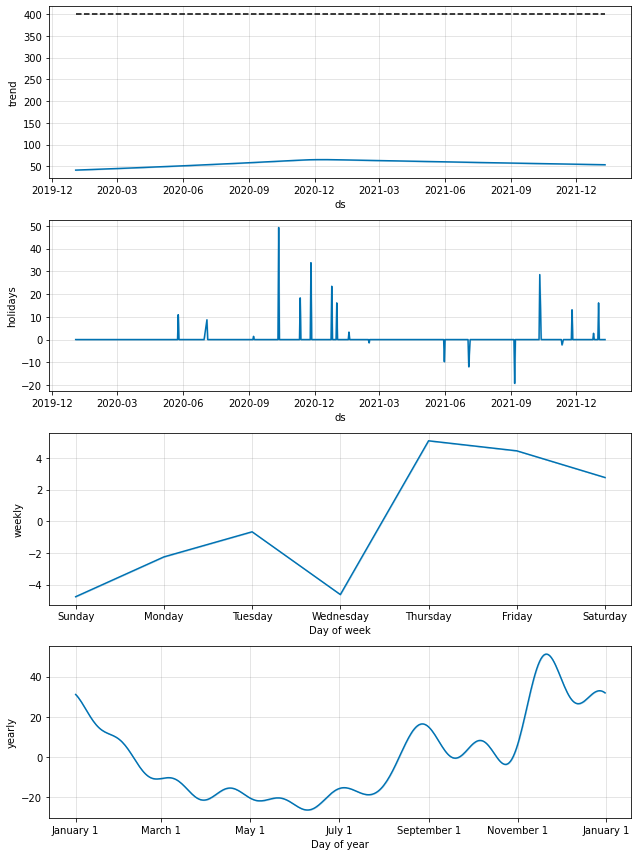

In [37]:
fig = final_model.plot_components(forecast)

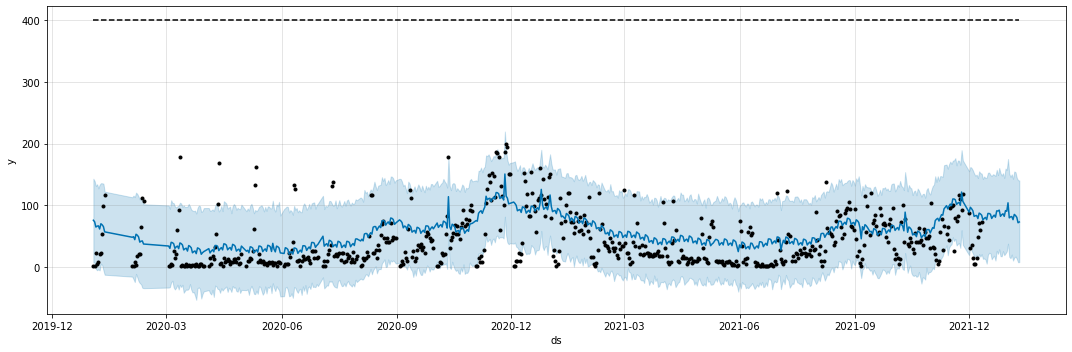

            ds      trend  cap  yhat_lower  yhat_upper  trend_lower  \
0   2020-01-03  41.091510  400    6.706065  142.950870    41.091510   
1   2020-01-04  41.151685  400    7.034709  139.313694    41.151685   
2   2020-01-05  41.211938  400   -3.682630  131.190840    41.211938   
3   2020-01-06  41.272269  400   -5.547236  134.064190    41.272269   
4   2020-01-07  41.332678  400   -4.017295  127.286065    41.332678   
..         ...        ...  ...         ...         ...          ...   
658 2022-01-06  53.581836  400   14.981128  154.734451    53.477097   
659 2022-01-07  53.553558  400   16.651935  153.557755    53.442146   
660 2022-01-08  53.525292  400   13.084257  144.396211    53.409987   
661 2022-01-09  53.497039  400    7.411936  140.547842    53.375227   
662 2022-01-10  53.468799  400    7.558171  140.126119    53.339661   

     trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0      41.091510            0.0                  0.0                  

In [15]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = final_model.plot(forecast,ax=ax)
plt.show()
print(forecast)

In [38]:
MAPE = mean_absolute_percentage_error(test_data_pr['y'],abs(forecast[-30:]["yhat"]))
print('MAPE', MAPE)

MAPE 36.43157077742492


In [39]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


from math import sqrt
from sklearn.metrics import mean_squared_error
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())


rmse_error = rmse(test_data_pr['y'],forecast[-30:]["yhat"])
mse_error = rmse_error**2
#mean_value = df1['CaseCount'].mean()
mape = mean_absolute_percentage_error(test_data_pr['y'], abs(forecast[-30:]["yhat"]))
mae = np.mean(np.abs(forecast[-30:]["yhat"] - test_data_pr['y']))
print("MAPE",round(mape,4))
print(f'MSE Error: {mse_error}\nRMSE Error: {rmse_error}')
print("MAE",round(mae,4))

MAPE 36.4316
MSE Error: 2415.0551228773566
RMSE Error: 49.14321034362078
MAE 37.1679


In [ ]:
final_model.params

In [ ]:
subset = [4,10]
beta = np.array(final_model.params["beta"])[0]
beta

In [ ]:
final_model.params

In [ ]:
final_model.train_component_cols

In [ ]:
final_model.params['beta']

In [ ]:
plt.figure(figsize=(10,4))

x = forecast.ds.values
y = forecast.trend.values
cp = final_model.changepoints

plt.plot(x,y)
ymin, ymax = plt.ylim()
plt.vlines(cp.values, ymin, ymax, linestyles="dashed")

In [ ]:
final_model.plot(forecast);

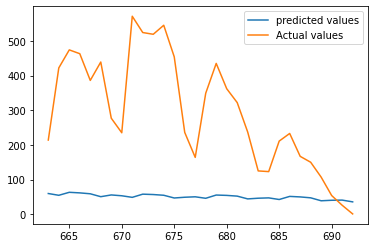

In [18]:
import matplotlib.pyplot as plt

future = final_model.make_future_dataframe(periods=60, freq='D')
future['cap'] = 300
forecast = final_model.predict(future)
forecast= forecast[30:]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

plt.plot(forecast[-30:]["yhat"], label="predicted values")
plt.plot(new['y'], label="Actual values" )
plt.legend(loc="upper right")
plt.show()

In [30]:
#print(b['y'])
print(forecast[:]["yhat"])

1      62.747943
2      54.235009
3      55.680633
4      56.141305
5      51.019982
         ...    
658    71.661745
659    69.817917
660    66.897482
661    58.132070
662    59.415790
Name: yhat, Length: 662, dtype: float64


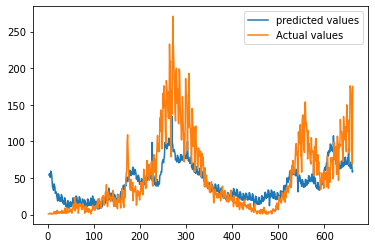

MAPE 225.1769
MSE Error: 1285.5404409417042
RMSE Error: 35.85443404854836
MAE 24.4009


In [40]:
import matplotlib.pyplot as plt

future = final_model.make_future_dataframe(periods=30, freq='D')
future['cap'] = 300
forecast = final_model.predict(future)
forecast= forecast[1:692]
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

plt.plot(forecast[1:692]["yhat"], label="predicted values")
plt.plot(b['y'], label="Actual values" )
plt.legend(loc="upper right")
plt.show()


rmse_error = rmse(b['y'],forecast[:]["yhat"])
mse_error = rmse_error**2
#mean_value = df1['CaseCount'].mean()
mape = mean_absolute_percentage_error(b['y'], abs(forecast[:]["yhat"]))
mae = np.mean(np.abs(forecast[:]["yhat"] - b['y']))
print("MAPE",round(mape,4))
print(f'MSE Error: {mse_error}\nRMSE Error: {rmse_error}')
print("MAE",round(mae,4))

In [22]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


from math import sqrt
from sklearn.metrics import mean_squared_error
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())


rmse_error = rmse(train_data_pr['y'],forecast[1:198]["yhat"])
mse_error = rmse_error**2
#mean_value = df1['CaseCount'].mean()
mape = mean_absolute_percentage_error(train_data_pr['y'], abs(forecast[1:198]["yhat"]))
mae = np.mean(np.abs(forecast[1:198]["yhat"] - train_data_pr['y']))
print("MAPE",round(mape,4))
print(f'MSE Error: {mse_error}\nRMSE Error: {rmse_error}')
print("MAE",round(mae,4))

ValueError: operands could not be broadcast together with shapes (633,) (197,) 

In [42]:
print(len(train_data_pr['y']))
print(len(forecast))

199
198


In [16]:
forecast['yhat']

30      30.660402
31      28.905907
32      20.288705
33      21.974802
34       8.390968
          ...    
254    140.121445
255    129.826411
256    113.441450
257    108.333402
258     89.102975
Name: yhat, Length: 229, dtype: float64

In [17]:
mae = np.mean(np.abs(forecast[-30:]["yhat"] -new['y'])) 
print(mae)

59.004057766581504


In [18]:
MAPE = mean_absolute_percentage_error(new['y'],abs(forecast[-30:]["yhat"]))
print('MAPE', MAPE)

MAPE 28.113484217178108


In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


from math import sqrt
from sklearn.metrics import mean_squared_error
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())


rmse_error = rmse(new['y'],forecast[-30:]["yhat"])
mse_error = rmse_error**2
#mean_value = df1['CaseCount'].mean()
mape = mean_absolute_percentage_error(new['y'], abs(forecast[-30:]["yhat"]))
mae = np.mean(np.abs(forecast[-30:]["yhat"] - new['y']))
print("MAPE",round(mape,4))
print(f'MSE Error: {mse_error}\nRMSE Error: {rmse_error}')
print("MAE",round(mae,4))
print(len(new['y']))


MAPE 62.0441
MSE Error: nan
RMSE Error: nan
MAE nan
30
